Importamos los distintos paquetes que vamos a utilizar

In [1]:
from sklearn_ubu.disturbing_neighbors import DisturbingNeighbors
from sklearn_ubu.disturbing_neighbors import BaseDisturbingNeighbors
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
import arff

In [19]:
dataset = arff.load(open('flags2.arff', "r"))
data = np.array(dataset['data'], dtype=float)
data

array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

In [21]:
rows = np.arange(0,data.shape[0])
columnsX = np.arange(0,data.shape[1]-7)
columnsy = np.arange(data.shape[1]-7,data.shape[1])
rows[:, np.newaxis]
X=data[rows[:, np.newaxis], columnsX]
y=data[rows[:, np.newaxis], columnsy]


Creamos nuestro clasificador BaseDisturbingNeighbors, al que le pasamos un clasificador y la semilla  
Usamos train_split para dividir nuestro conjunto en un conjunto de entrenamiento y otro de test

In [22]:
dn = BaseDisturbingNeighbors()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.5, train_size=0.5)


Entrenamos nuestro clasificador, en este caso un arbol  
Predecimos nuestro clasificador  
Predecimos las probabilidades de nuestro clasificador  
Calculamos la distancia de hamming_loss

In [24]:
classifier_train = dn.fit(X_train, y_train)

y_predict = dn.predict(X_test)

y_predict_proba = dn.predict_proba(X_test)

dist = hamming_loss(y_test, y_predict)
print(dist)

0.3269513991163476


Mostramos nuestro arbol creado

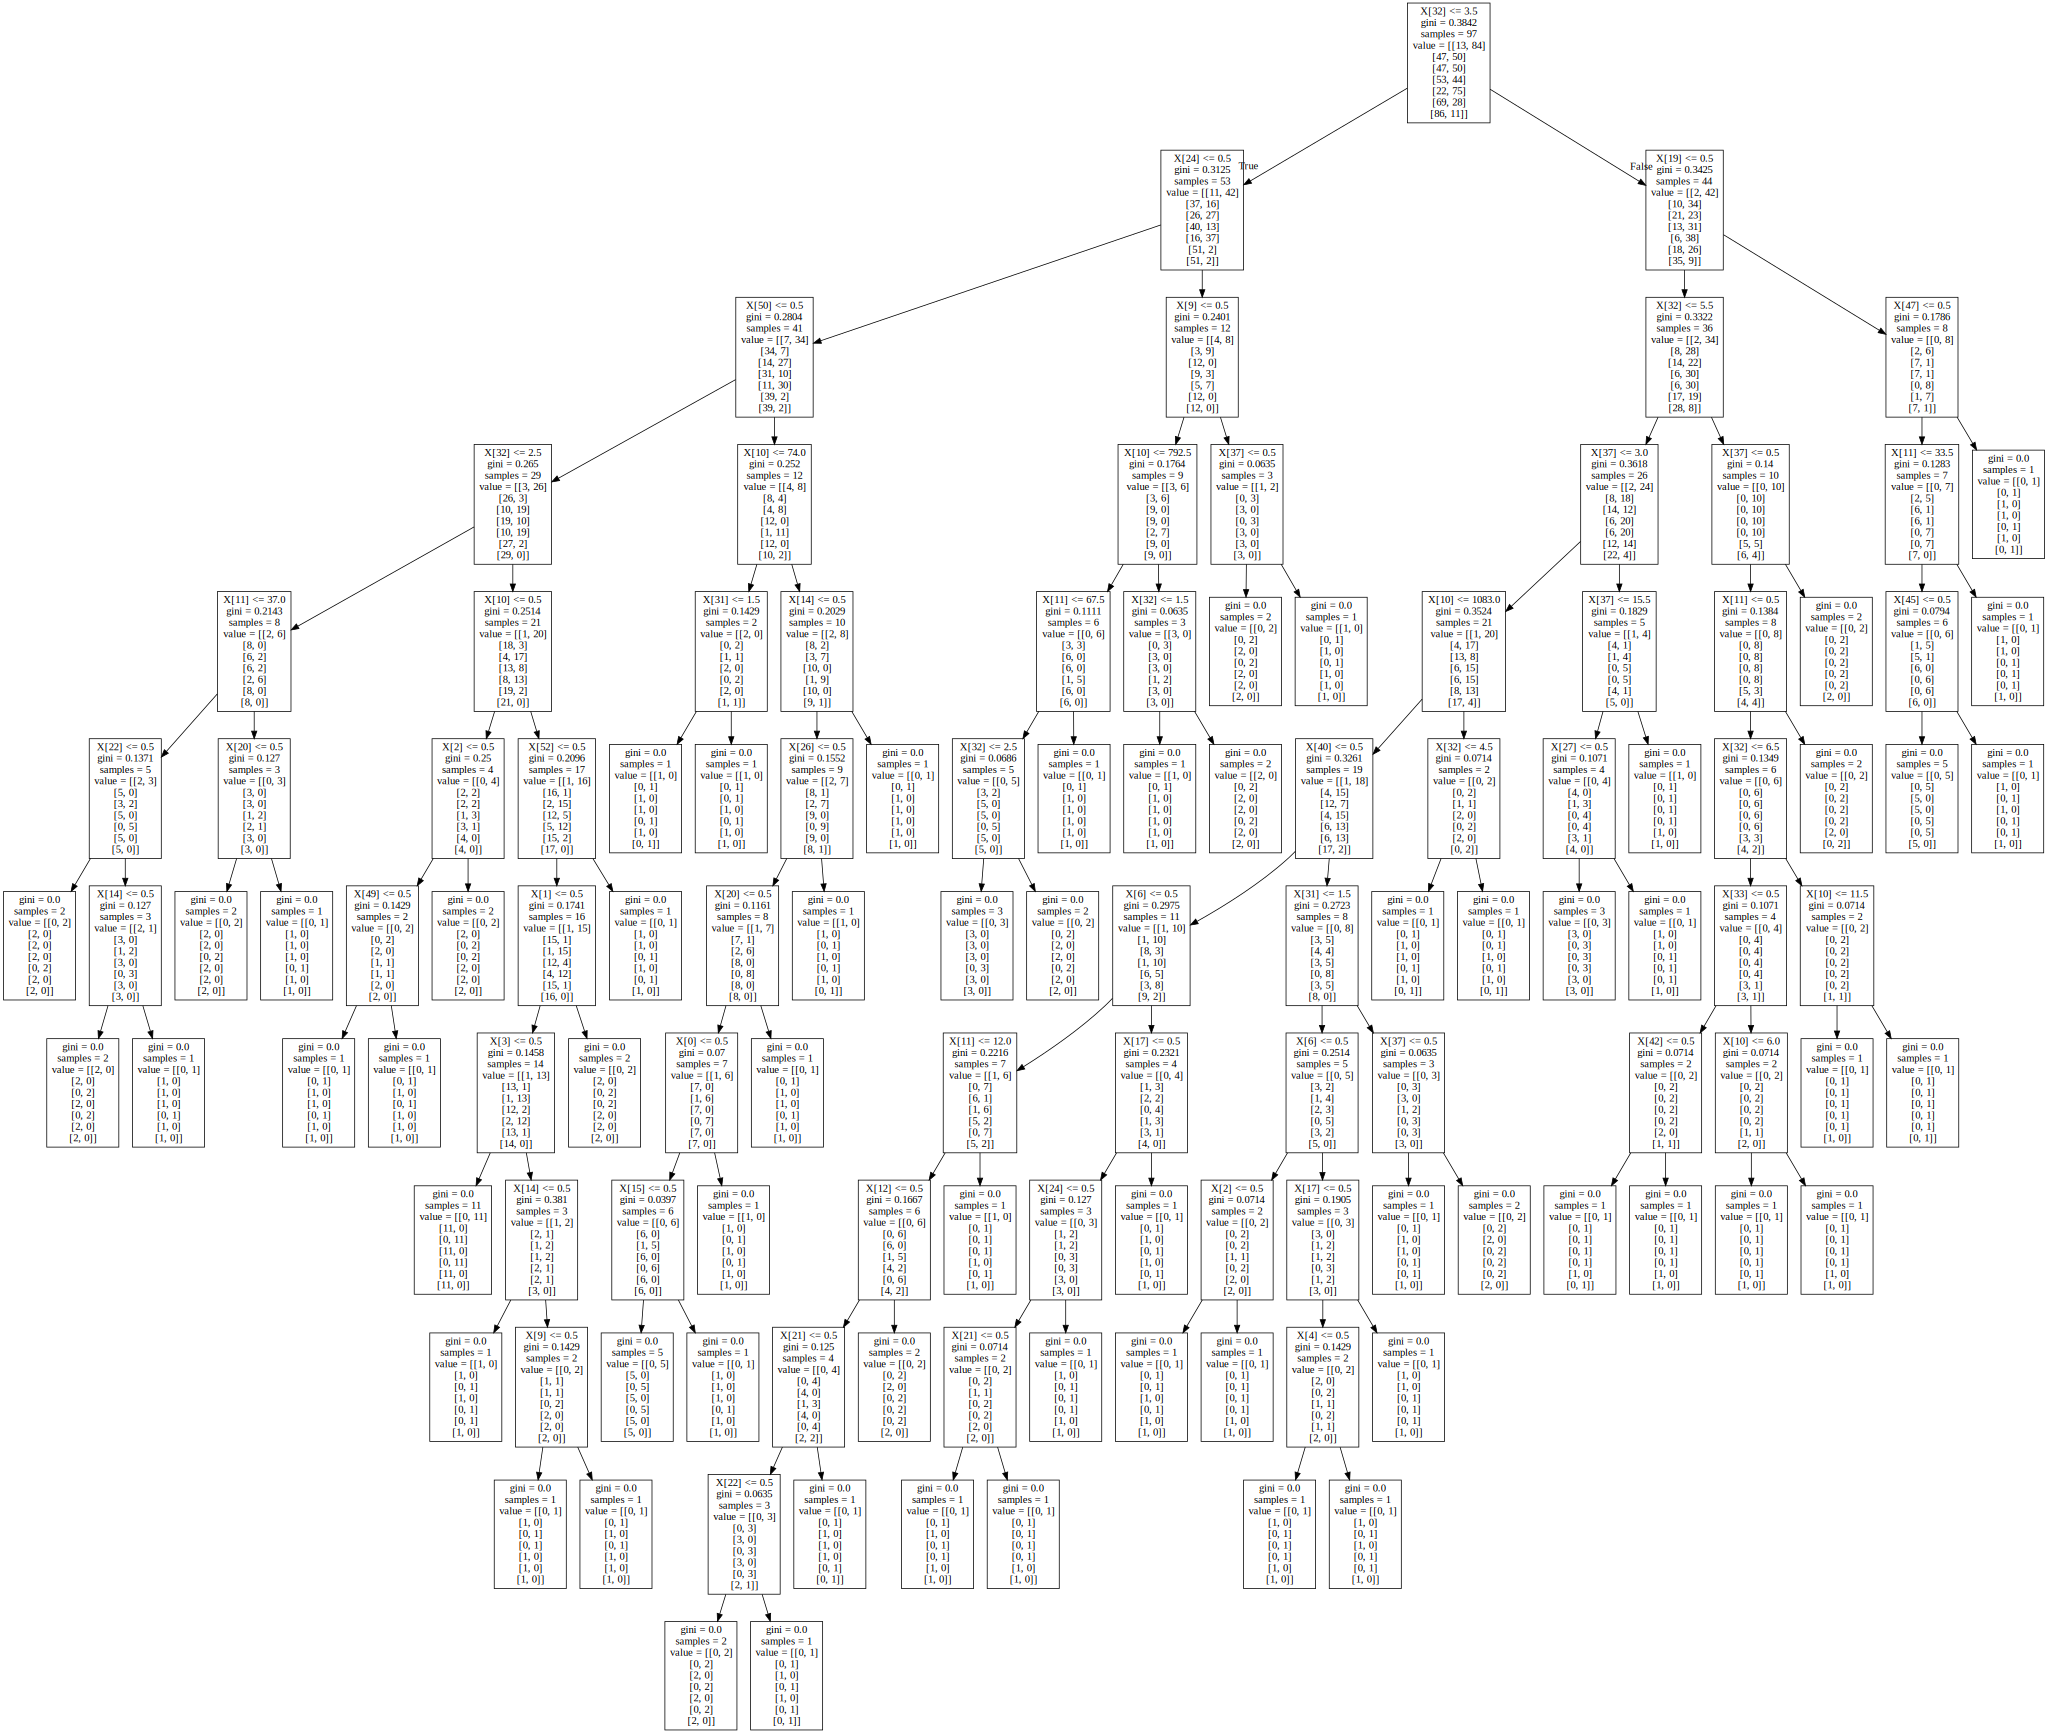

In [25]:
dot_data = export_graphviz(classifier_train, out_file=None)
graph = graphviz.Source(dot_data)
graph

Hacemos validación cruzada

In [26]:
scores = cross_val_score(dn, X, y, cv=5)
print(scores)

[ 0.1025641   0.23076923  0.17948718  0.23076923  0.13157895]
